In [1]:
# 数据预处理
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%load_ext autoreload
%autoreload 2

In [2]:
# 读取数据
from utils.label_index_convert import LabelIndexConvert
from dataset import Dog_dataset

current_path = os.getcwd()

label_index_convert = LabelIndexConvert(current_path)

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 所有训练数据
full_train_dataset = Dog_dataset(root_path=current_path,
                                 transform=transform,
                                 mode='train',
                                 label_index_convert=label_index_convert)
# 读取测试数据
test_dataset = Dog_dataset(root_path=current_path,
                           transform=transform,
                           mode='test',
                           label_index_convert=label_index_convert)
# for step,(x,y) in enumerate(test_dataset):
#     print(x,y)
#     print(x.shape)
#     plt.imshow(x.permute(1,2,0))
#     break

In [3]:
# 将训练数据分为训练集和验证集
all_train_count = len(full_train_dataset)
train_rate = 0.8
train_size = int(all_train_count * train_rate)
val_size = all_train_count - train_size
print('all_train_count:', all_train_count)
print('train_size:', train_size)
print('val_size:', val_size)
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

all_train_count: 10222
train_size: 8177
val_size: 2045


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 64, 64])


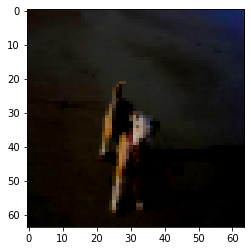

lakeland_terrier


In [4]:
# 输出图片
for step, (x, y) in enumerate(train_dataset):
    print(x.shape)
    plt.imshow(x.permute(1, 2, 0))
    plt.show()
    print(label_index_convert.index_to_label[y.item()])
    break

In [5]:
# 使用dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [6]:
# 训练函数  验证函数
def train(model, train_loader, val_loader, optimizer, loss_func, epochs=10):
    model.to(device)
    for epoch in range(epochs):
        print('epoch:', epoch)
        model.train()
        for step, (x, y) in enumerate(train_dataloader):
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            loss = loss_func(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if step % 10 == 0:
                print('step:', step, 'loss:', loss.item())
        val(model, val_dataloader, epoch)


def val(model, val_dataloader, epoch):
    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_count = 0
        for step, (x, y) in enumerate(val_dataloader):
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            y_pred = torch.argmax(y_pred, dim=1)
            total_correct += torch.sum(y_pred == y).item()
            total_count += len(y)
        print('val acc:', total_correct / total_count)

In [7]:
# 训练模型
from model.FirstModel import FirstModel
from torch import optim
from torch import nn

model = FirstModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

train(model, train_dataloader, val_dataloader, optimizer, loss_func, epochs=10)

epoch: 0
step: 0 loss: 5.098692893981934
step: 10 loss: 227.66258239746094
step: 20 loss: 166.0562744140625
step: 30 loss: 170.94358825683594
step: 40 loss: 114.97247314453125
step: 50 loss: 179.5550537109375
step: 60 loss: 185.55380249023438
step: 70 loss: 158.044677734375
step: 80 loss: 119.95942687988281
step: 90 loss: 149.5535125732422
step: 100 loss: 125.42408752441406
step: 110 loss: 152.18756103515625
step: 120 loss: 99.46311950683594
step: 130 loss: 83.3716812133789
step: 140 loss: 79.50899505615234
step: 150 loss: 125.50128936767578
step: 160 loss: 58.894447326660156
step: 170 loss: 54.3046760559082
step: 180 loss: 98.11761474609375
step: 190 loss: 81.6775131225586
step: 200 loss: 71.16779327392578
step: 210 loss: 36.38779830932617
step: 220 loss: 73.09176635742188
step: 230 loss: 64.92192840576172
step: 240 loss: 52.7047233581543
step: 250 loss: 43.20417404174805
step: 260 loss: 26.017139434814453
step: 270 loss: 34.534080505371094
step: 280 loss: 33.39739990234375
step: 290 

KeyboardInterrupt: 